# **Translate**

In [1]:
pip install googletrans==3.1.0a0 --quiet

     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 1.5 MB 69.8 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 65 kB 4.5 MB/s 
     |████████████████████████████████| 53 kB 2.8 MB/s 


In [2]:
# To test how it works
from googletrans import Translator
translator = Translator()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('benin_scripping_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Reference_id           710 non-null    object
 1   Contracting_Authority  710 non-null    object
 2   Offer_Sel_Date         710 non-null    object
 3   Title_entry            710 non-null    object
 4   Start_date             704 non-null    object
 5   End_date               710 non-null    object
dtypes: object(6)
memory usage: 33.4+ KB


In [6]:
df.dtypes

Reference_id             object
Contracting_Authority    object
Offer_Sel_Date           object
Title_entry              object
Start_date               object
End_date                 object
dtype: object

In [7]:
df['Start_date'] = pd.to_datetime(df['Start_date'])

In [8]:
df['End_date'] = pd.to_datetime(df['End_date'])

In [9]:
df_current = df

In [10]:
df_current['Start_month'] = pd.to_datetime(df_current['Start_date']).dt.month

In [11]:
df_current['End_month'] = pd.to_datetime(df_current['End_date']).dt.month

In [12]:
df_current['End_year'] = pd.to_datetime(df_current['End_date']).dt.year

In [13]:
df_current.head()

,Reference_id,Contracting_Authority,Offer_Sel_Date,Title_entry,Start_date,End_date,Start_month,End_month,End_year
0,T_PAGEFCOM_55261,Ministère du Cadre de Vie et du Développement ...,03-12-2024,Travaux de mise en œuvre des plans d'aménageme...,2022-12-12,2023-03-12,12.0,3,2023
1,T_DPET_62490,Agence Nationale d'Approvisionnement en Eau Po...,18-01-2023,Réalisation des travaux des Systèmes d'Approvi...,2022-12-15,2023-01-18,12.0,1,2023
2,T_ST_56438,Commune d'Athiémé,11-01-2023,Travaux de réhabilitation de l’ancien ouvrage ...,2022-12-12,2023-11-01,12.0,11,2023
3,S_DQSSE_66707,Port Autonome de Cotonou,06-01-2023,Accord cadre pour le regroupement et le convoy...,2022-05-12,2023-06-01,5.0,6,2023
4,T_DST_66375,Commune de Ouidah,05-01-2023,Travaux de réalisation d'une clôture partielle...,2022-05-12,2023-05-01,5.0,5,2023


# **Translation**

In [14]:
# to create new columns with the translation inside
# It would take a while, so be patient when runing
french_list = ['Title_entry', 'Contracting_Authority']
for name in french_list : 
  new_name = f'{name}_trans'
  df_current[new_name] = df_current[name]
  for i in range(len(df)) : 
    df_current[new_name][i] = translator.translate(df[name][i], src='fr', dest="en").text

<ipython-input-14-3ba59b7ec486>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current[new_name][i] = translator.translate(df[name][i], src='fr', dest="en").text


In [15]:
# to export the data and download it
from google.colab import files
df_current.to_csv('df_benin_trans.csv', encoding = 'utf-8-sig') 
files.download('df_benin_trans.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Keywords extraction**

In [16]:
from gensim.summarization import keywords

In [17]:
new_col = 'Title_entry_kw_fr'
df_current[new_col] = df_current['Title_entry']
for i in range(len(df)) : 
  df_current[new_col][i] = keywords(df_current['Title_entry'][i], words=2, split = True, lemmatize=True)

<ipython-input-17-8a3212a942d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current[new_col][i] = keywords(df_current['Title_entry'][i], words=2, split = True, lemmatize=True)


In [19]:
df_current['Offer_Sel_Date'] = pd.to_datetime(df_current['Offer_Sel_Date'])

In [20]:
df_current['Duration'] = df_current['End_date'] - df_current['Start_date']

In [31]:
#Converting the numeric variables in release_day to string
mapper = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df_current['Start_month'] = df_current['Start_month'].map(mapper)
df_current['End_month'] = df_current['End_month'].map(mapper)

In [32]:
df_current.head(10)

,Reference_id,Contracting_Authority,Offer_Sel_Date,Title_entry,Start_date,End_date,Start_month,End_month,End_year,Title_entry_trans,Contracting_Authority_trans,Title_entry_kw_fr,Duration
0,T_PAGEFCOM_55261,Ministère du Cadre de Vie et du Développement ...,2024-03-12,Travaux de mise en œuvre des plans d'aménageme...,2022-12-12,2023-03-12,December,March,2023,Implementation works of simplified management ...,Ministry of the Living Environment and Sustain...,"[des, simplifiee]",90 days
1,T_DPET_62490,Agence Nationale d'Approvisionnement en Eau Po...,2023-01-18,Réalisation des travaux des Systèmes d'Approvi...,2022-12-15,2023-01-18,December,January,2023,Completion of works for the Multi-Village Drin...,National Agency for Drinking Water Supply in R...,"[des, villages]",34 days
2,T_ST_56438,Commune d'Athiémé,2023-11-01,Travaux de réhabilitation de l’ancien ouvrage ...,2022-12-12,2023-11-01,December,November,2023,Rehabilitation works of the old crossing struc...,Municipality of Athieme,"[ouvrages, lineaires]",324 days
3,S_DQSSE_66707,Port Autonome de Cotonou,2023-06-01,Accord cadre pour le regroupement et le convoy...,2022-05-12,2023-06-01,May,June,2023,Framework agreement for the grouping and conve...,Autonomous Port of Cotonou,"[des, cadre]",385 days
4,T_DST_66375,Commune de Ouidah,2023-05-01,Travaux de réalisation d'une clôture partielle...,2022-05-12,2023-05-01,May,May,2023,Construction works of a partial fence at EPP G...,Municipality of Ouidah,"[lot, portail]",354 days
5,T_DST_66751,Mairie de Cotonou,2023-05-01,Construction et équipements de bâtiments de ty...,2022-12-14,2023-05-01,December,May,2023,Construction and equipment of R+2 type buildin...,City hall of Cotonou,"[ceg, les]",138 days
6,S_DT_67214,Port Autonome de Cotonou,2023-05-01,Sondage bathymétrique du bassin et chenal d’ac...,2022-11-28,2023-05-01,November,May,2023,Bathymetric survey of the basin and access cha...,Autonomous Port of Cotonou,"[sondage, bathymetrique]",154 days
7,T_ST_62925,Commune de Savè,2023-04-01,Travaux d’aménagement de la rocade de OUOGHI a...,2022-12-12,2023-04-01,December,April,2023,Development works of the OUOGHI ring road with...,Commune of Save,"[avec, lot]",110 days
8,F_ST_67438,Commune de Kétou,2023-03-01,Acquisition de pièce des rechange dans le cadr...,2022-12-12,2023-03-01,December,March,2023,Acquisition of spare parts as part of the reha...,Municipality of Ketou,"[des, sur]",79 days
9,T_ST_61211,Commune d'Adjohoun,2022-12-29,Travaux de réhabilitation des bureaux de la Ré...,2022-12-15,2022-12-29,December,December,2022,Rehabilitation works of the offices of the Ped...,Municipality of Adjohoun,"[des, region]",14 days


# **EDA**

**Contracting_Authority**

In [22]:
df['Contracting_Authority'].value_counts()

Société Béninoise d'Energie Electrique                                44
Agence Béninoise d'Electrification Rurale et de Maîtrise d'Energie    33
Ministère de l'Energie                                                32
Société Nationale de la Mécanisation Agricole                         25
Mairie de Parakou                                                     20
                                                                      ..
Commune de Bohicon                                                     1
Société de la POSTE du Bénin                                           1
Hôpital de zone Allada-Toffo-Zè                                        1
Commune de Bassila                                                     1
Autorité de Régulation des Marchés Publics                             1
Name: Contracting_Authority, Length: 131, dtype: int64

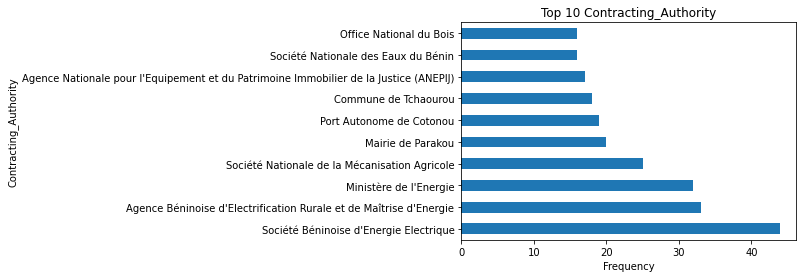

In [23]:
df['Contracting_Authority'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Contracting_Authority')
plt.xlabel('Frequency')
plt.ylabel('Contracting_Authority')
plt.show()

**Start and End date**



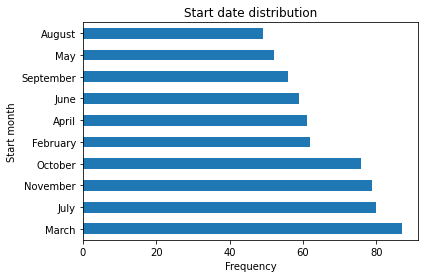

In [34]:
df['Start_month'].value_counts()[:10].plot(kind='barh')
plt.title('Start date distribution')
plt.xlabel('Frequency')
plt.ylabel('Start month')
plt.show()

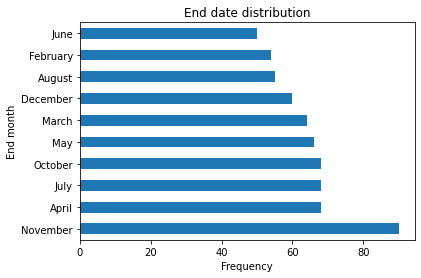

In [36]:
df['End_month'].value_counts()[:10].plot(kind='barh')
plt.title('End date distribution')
plt.xlabel('Frequency')
plt.ylabel('End month')
plt.show()

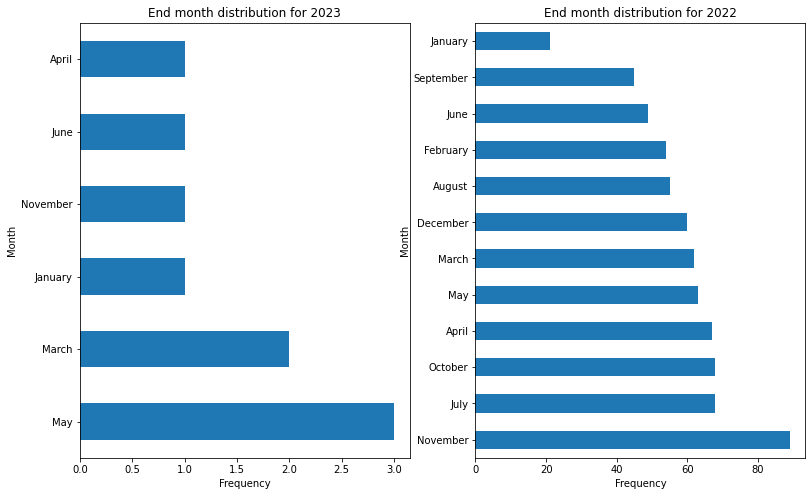

In [45]:
plt.figure(figsize=(13,8))
i = 1
for year in df_current['End_year'].unique():
  plt.subplot(1,2,i)
  df_current['End_month'][df_current['End_year'] == year].value_counts().plot(kind='barh')
  plt.title(f'End month distribution for {year}')
  plt.xlabel('Frequency')
  plt.ylabel('Month')
  i+=1
plt.show()

**Title entry**

Keywords analysis

In [78]:
# Keywords spliting
title_kw_1 = []
title_kw_2 = []
for i in range(len(df_current['Title_entry_kw_fr'])) :
  if len(df_current['Title_entry_kw_fr'][i]) == 0:
    title_kw_1.append('Null')
    title_kw_2.append('Null')
  elif len(df_current['Title_entry_kw_fr'][i]) == 1:  
    title_kw_1.append(df_current['Title_entry_kw_fr'][i][0])
    title_kw_2.append(df_current['Title_entry_kw_fr'][i][0])
  else :
    title_kw_1.append(df_current['Title_entry_kw_fr'][i][0])
    title_kw_2.append(df_current['Title_entry_kw_fr'][i][1])
  

In [79]:
title_kw_1 = pd.DataFrame(title_kw_1)
title_kw_2 = pd.DataFrame(title_kw_2)

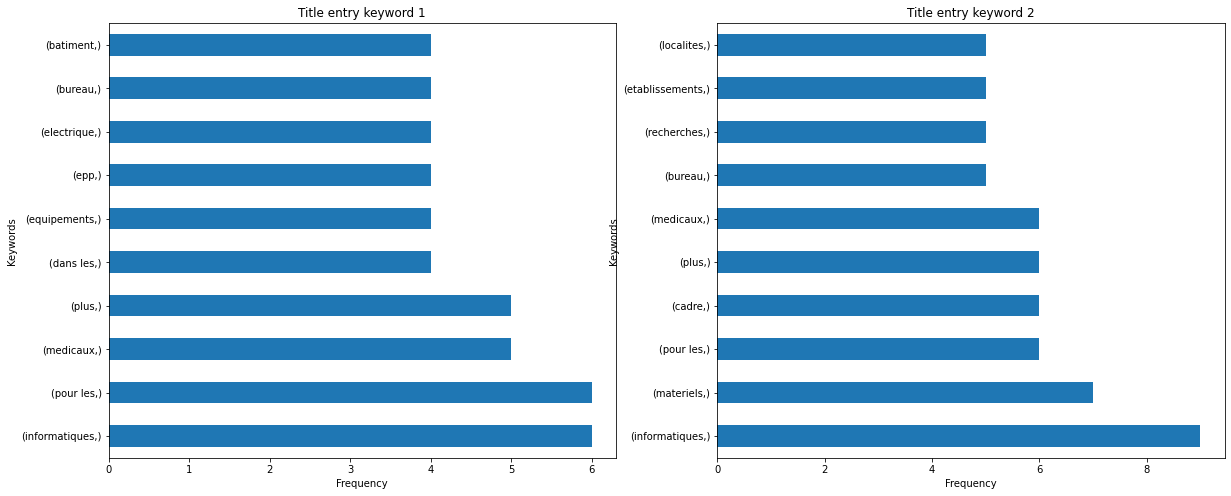

In [95]:
kw = [title_kw_1, title_kw_2]
plt.figure(figsize=(20,8))
i = 1
for key in kw:
  plt.subplot(1,2,i)
  key.value_counts()[7:17].plot(kind='barh')
  plt.title(f'Title entry keyword {i}')
  plt.xlabel('Frequency')
  plt.ylabel('Keywords')
  i+=1
plt.show()

In [96]:
df_current['Country'] = 'Benin'
df_current['Language'] = 'French'
df_current['Portal_URL'] = 'https://marches-publics.bj/appels-doffres'

In [97]:
# to export the data and download it
from google.colab import files
df_current.to_csv('Final_benin_after_EDA.csv', encoding = 'utf-8-sig') 
files.download('Final_benin_after_EDA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>